<a href="https://colab.research.google.com/github/TMhdSofyan/Convergence_Analysis/blob/main/PCE_SampleTuning_22May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/THESIS/Data/Experimental_Design2.csv')
df.tail()

ID Generator    Status      Result Status Proxy Role Keep SR3  \
17072  17072      User  Complete  NormalTermination   Training     Auto   
17073  17073      User  Complete  NormalTermination   Training     Auto   
17074  17074      User  Complete  NormalTermination   Training     Auto   
17075  17075      User  Complete  NormalTermination   Training     Auto   
17076  17076      User  Complete  NormalTermination   Training     Auto   

       Has SR3  Rating     CCPOR       KRG  ...  PERMK_MULTI  POR_MULTI  \
17072    False       0  0.000005  0.531235  ...     1.159760   0.997680   
17073    False       0  0.000004  0.499895  ...     0.870061   1.156218   
17074    False       0  0.000004  0.509262  ...     0.960209   0.982429   
17075    False       0  0.000005  0.504134  ...     1.041308   1.062378   
17076    False       0  0.000005  0.431177  ...     1.219194   1.158148   

           SORW    Cum_Oil      Cum_Gas  Execution Node          Dataset Path  \
17072  0.100961  1643914.0  317224130.0      77-1134-41  SA.cmsd\SA_17072.dat   
17073  0.108906  1661441.1  330066270.0      77-1134-41  SA.cmsd\SA_17073.dat   
17074  0.100172  1584137.9  315742180.0      77-1134-41  SA.cmsd\SA_17074.dat   
17075  0.090308  1632599.6  327702820.0      77-1134-41  SA.cmsd\SA_17075.dat   
17076  0.097388  1668201.6  328796160.0      77-1134-41  SA.cmsd\SA_17076.dat   

       Optimal  MCMC Count  Comment  
17072    False           0      NaN  
17073    False           0      NaN  
17074    False           0      NaN  
17075    False           0      NaN  
17076    False           0      NaN  

[5 rows x 25 columns]

In [4]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [5]:
!pip3 install UQpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.7/294.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 kB 11.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=e0ea78f012cfb24b1f09c1938a661a26315368b2c80b7240e2d8cf4bf7ed1c48
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [6]:
df.columns

Index(['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating', 'CCPOR', 'KRG', 'KRO', 'KRW', 'NG', 'NW',
       'PERMI_MULTI', 'PERMK_MULTI', 'POR_MULTI', 'SORW', 'Cum_Oil', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'],
      dtype='object')

In [7]:
df2 = df.drop(columns = ['ID', 'Generator', 'Status', 'Result Status', 'Proxy Role', 'Keep SR3',
       'Has SR3', 'Rating','KRG', 'KRO', 'KRW', 'NG', 'NW','PERMK_MULTI', 'SORW', 'Cum_Gas',
       'Execution Node', 'Dataset Path', 'Optimal', 'MCMC Count', 'Comment'])
df2.tail()

CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil
17072  0.000005     1.002530   0.997680  1643914.0
17073  0.000004     1.020072   1.156218  1661441.1
17074  0.000004     0.787814   0.982429  1584137.9
17075  0.000005     0.881290   1.062378  1632599.6
17076  0.000005     1.074085   1.158148  1668201.6

_________

#**Sample 500**

In [8]:
first_1000 = df2.head(500)
X = first_1000.drop(columns="Cum_Oil").to_numpy()
y = first_1000.Cum_Oil.to_numpy()

In [9]:
X.shape

(500, 3)

In [10]:
y

array([1641502. , 1658139.5, 1638181.8, 1637746.9, 1642039. , 1643717.4,
       1655225.8, 1648534.3, 1580876.5, 1612149.5, 1651127.6, 1657736.9,
       1648434.1, 1620649.8, 1597741.3, 1637607.4, 1633578.8, 1671130. ,
       1633316.1, 1628004.9, 1648828.8, 1647589.3, 1623170.6, 1622766.6,
       1591752.8, 1595351.6, 1632457.8, 1630450. , 1635968.9, 1665459.8,
       1627404.9, 1661058. , 1588380. , 1638499.8, 1637566. , 1662652.4,
       1652195.1, 1637508.1, 1626611. , 1629242.3, 1651163. , 1641375. ,
       1633874.4, 1635672.9, 1619991.9, 1654373.4, 1655188.1, 1630664.9,
       1651584.4, 1662198.1, 1632719.9, 1618907.3, 1632368.3, 1598667.4,
       1645383.4, 1607628.8, 1598181.3, 1619018.5, 1643182.9, 1636174.5,
       1664451.6, 1584142.9, 1603530.9, 1663903.8, 1649015.8, 1647225.3,
       1610777.3, 1600663.8, 1631384.8, 1571254.6, 1647346. , 1638869.4,
       1673400. , 1623496.9, 1659005.6, 1610355.5, 1614475.3, 1672096.3,
       1595829.5, 1624273.6, 1646633.8, 1653613.4, 

In [11]:
from UQpy.distributions import Uniform, Normal, JointIndependent
from UQpy.surrogates import *

In [12]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [13]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [14]:
moments=pce.get_moments()
moments

(1760544.5526961142, 6728018168148006.0)

In [15]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.76054455e+06]
 [-9.65815333e+05]
 [-7.24966224e+05]
 [-6.10558859e+05]
 [-2.33426739e+05]
 [-9.51770318e+05]
 [ 1.98341752e+06]
 [ 4.62999948e+05]
 [ 7.88823749e+05]
 [-7.34359297e+05]
 [-3.71224793e+06]
 [ 3.14494039e+06]
 [-3.89540431e+05]
 [-6.87351041e+06]
 [ 5.15943946e+05]
 [ 3.04640165e+06]
 [ 3.55567782e+06]
 [ 2.96943915e+06]
 [ 1.92746359e+06]
 [-7.01998998e+06]
 [-2.11774871e+06]
 [-2.18927301e+06]
 [ 1.81585033e+06]
 [-1.44283714e+06]
 [ 3.91650075e+06]
 [ 1.55739039e+06]
 [-4.79786392e+05]
 [ 4.41970149e+06]
 [ 3.08203166e+06]
 [ 1.47275683e+06]
 [-1.94493192e+05]
 [ 2.05577124e+06]
 [-1.21596538e+06]
 [-1.19437008e+06]
 [-3.46024874e+06]
 [-5.88473428e+06]
 [-5.00978234e+06]
 [-4.17732894e+06]
 [ 1.46355404e+07]
 [-1.57689515e+06]
 [-2.01007321e+07]
 [ 3.37604896e+06]
 [-3.28748018e+05]
 [-5.02060079e+06]
 [ 1.50096963e+07]
 [ 1.19801562e+07]
 [-1.11657543e+06]
 [ 5.91678127e+06]
 [ 8.51940253e+06]
 [ 6.13589869e+06]
 [ 3.28263916e+05]
 [-3.25849008

In [18]:
Test_Data = df2.tail(16576)
X_test = Test_Data.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [19]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data['Cum_Oil_PCE'] = y_test

Test_Data.head()

CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil   Cum_Oil_PCE
501  0.000005     0.959064   1.052848  1645291.4  1.644612e+06
502  0.000005     1.138506   1.028657  1656446.0  1.659012e+06
503  0.000005     1.065293   0.968214  1640854.0  1.641137e+06
504  0.000005     0.899609   0.900294  1610371.0  1.609072e+06
505  0.000005     0.851348   0.890460  1596850.8  1.603776e+06

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data)

# Predict on training and test sets
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.09418394286355737


In [21]:
import numpy as np

# Predict on training and test sets
y_test = Test_Data['Cum_Oil'].to_numpy()
y_test_PCE = Test_Data['Cum_Oil_PCE'].to_numpy()

# Number of samples
n_samples = len(y_test)

# Calculate the variance of the actual data
var_y = np.sum((y_test - np.mean(y_test))**2) / n_samples

# Calculate the sum of squared errors between actual and predicted values
squared_errors = np.sum((y_test - y_test_PCE)**2)

# Calculate the empirical error
epsilon_emp = squared_errors / var_y

print('Empirical error, epsilon_emp:', epsilon_emp)

Empirical error, epsilon_emp: 42043047.84207161


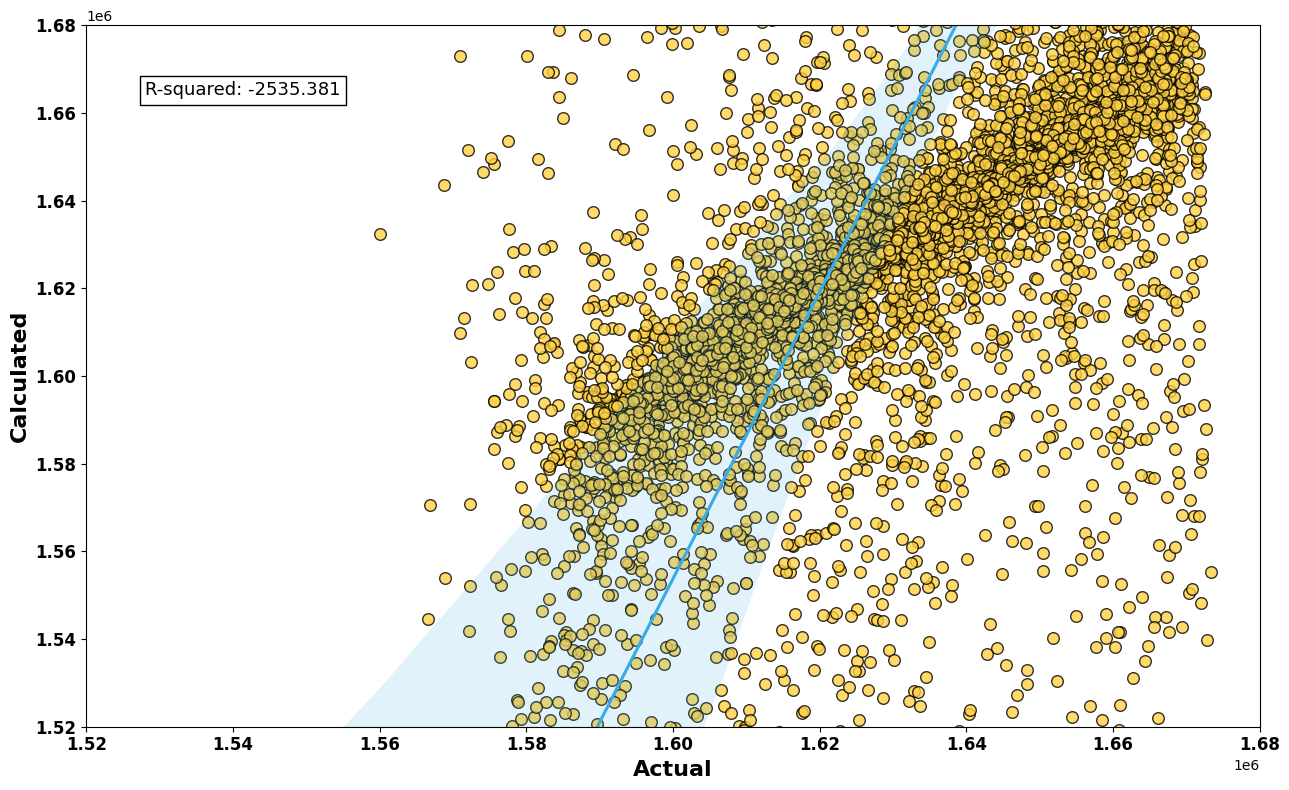

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample500.png', dpi=600)
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.7, color='#0000a5', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Cumulative probability curve
sorted_cum_oil = np.sort(df['Cum_Oil'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(df['Cum_Oil'], 10)
p50 = np.percentile(df['Cum_Oil'], 50)
p10 = np.percentile(df['Cum_Oil'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Cumulative.png', dpi=600)
plt.show()

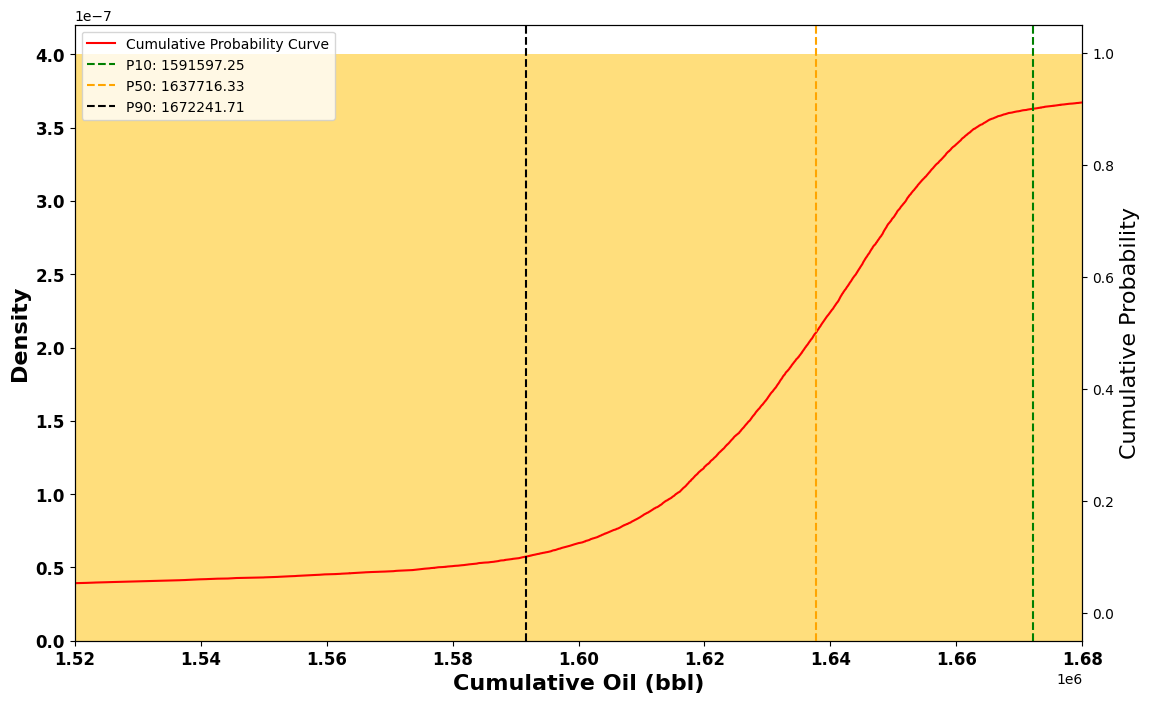

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Sample500.png', dpi=600)
plt.show()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Sample500.png', dpi=600)
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Create the cumulative distribution plot
plt.figure(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Sample500.png', dpi=600)
plt.show()

___________

#**DEGREE 5**

In [23]:
first_1000_2 = df2.head(1000)
X = first_1000_2.drop(columns="Cum_Oil").to_numpy()
y = first_1000_2.Cum_Oil.to_numpy()

In [24]:
X.shape

(1000, 3)

In [25]:
y

array([1641502. , 1658139.5, 1638181.8, 1637746.9, 1642039. , 1643717.4,
       1655225.8, 1648534.3, 1580876.5, 1612149.5, 1651127.6, 1657736.9,
       1648434.1, 1620649.8, 1597741.3, 1637607.4, 1633578.8, 1671130. ,
       1633316.1, 1628004.9, 1648828.8, 1647589.3, 1623170.6, 1622766.6,
       1591752.8, 1595351.6, 1632457.8, 1630450. , 1635968.9, 1665459.8,
       1627404.9, 1661058. , 1588380. , 1638499.8, 1637566. , 1662652.4,
       1652195.1, 1637508.1, 1626611. , 1629242.3, 1651163. , 1641375. ,
       1633874.4, 1635672.9, 1619991.9, 1654373.4, 1655188.1, 1630664.9,
       1651584.4, 1662198.1, 1632719.9, 1618907.3, 1632368.3, 1598667.4,
       1645383.4, 1607628.8, 1598181.3, 1619018.5, 1643182.9, 1636174.5,
       1664451.6, 1584142.9, 1603530.9, 1663903.8, 1649015.8, 1647225.3,
       1610777.3, 1600663.8, 1631384.8, 1571254.6, 1647346. , 1638869.4,
       1673400. , 1623496.9, 1659005.6, 1610355.5, 1614475.3, 1672096.3,
       1595829.5, 1624273.6, 1646633.8, 1653613.4, 

In [26]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [27]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [28]:
moments=pce.get_moments()
moments

(1601728.1901737251, 8458851360223.883)

In [29]:
# Optionally, print the PCE coefficients or any other relevant information
print("PCE Coefficients:")
print(pce.coefficients)

PCE Coefficients:
[[ 1.60172819e+06]
 [-4.96439186e+03]
 [-1.16381084e+04]
 [-5.85393393e+04]
 [-1.28160176e+05]
 [-1.07414426e+05]
 [-1.08232933e+05]
 [ 1.35291901e+04]
 [-2.31079466e+04]
 [-5.97497785e+04]
 [-7.84908473e+04]
 [-1.60027106e+05]
 [-4.05286720e+05]
 [-3.00264876e+04]
 [-1.32456058e+05]
 [ 5.73288375e+04]
 [ 7.38877012e+04]
 [-9.39263543e+03]
 [-1.55365744e+05]
 [ 5.35159217e+03]
 [-3.07970217e+05]
 [-9.04591096e+04]
 [-1.92013679e+05]
 [-2.86867786e+05]
 [-2.35326732e+05]
 [-1.04504050e+05]
 [ 2.47185069e+04]
 [-4.34735381e+03]
 [-4.42275483e+04]
 [ 4.96194831e+04]
 [-1.30626737e+05]
 [ 3.14829087e+04]
 [ 9.01622792e+04]
 [ 1.29455534e+04]
 [-2.02026210e+05]
 [-2.49251683e+04]
 [-4.98915512e+05]
 [-3.48674185e+05]
 [ 1.18548246e+05]
 [-8.69444778e+05]
 [-1.18494898e+05]
 [-4.93103240e+05]
 [-7.25140400e+04]
 [-1.21362662e+05]
 [ 3.27546006e+05]
 [ 1.72884652e+05]
 [-2.01132067e+05]
 [-1.76778519e+05]
 [-1.40511471e+05]
 [ 1.28728617e+05]
 [ 2.14947636e+05]
 [-3.68286407

In [30]:
Test_Data2 = df2.tail(16576)
X_test = Test_Data2.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [31]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data2['Cum_Oil_PCE'] = y_test

Test_Data2.head()

CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil   Cum_Oil_PCE
501  0.000005     0.959064   1.052848  1645291.4  1.644539e+06
502  0.000005     1.138506   1.028657  1656446.0  1.656232e+06
503  0.000005     1.065293   0.968214  1640854.0  1.641632e+06
504  0.000005     0.899609   0.900294  1610371.0  1.610763e+06
505  0.000005     0.851348   0.890460  1596850.8  1.597605e+06

In [32]:
# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)
test_r2

-1.1464921556131324

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data2)

# Predict on training and test sets
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.002231373952029057


In [34]:
import numpy as np

# Predict on training and test sets
y_test = Test_Data2['Cum_Oil'].to_numpy()
y_test_PCE = Test_Data2['Cum_Oil_PCE'].to_numpy()

# Number of samples
n_samples = len(y_test)

# Calculate the variance of the actual data
var_y = np.sum((y_test - np.mean(y_test))**2) / n_samples

# Calculate the sum of squared errors between actual and predicted values
squared_errors = np.sum((y_test - y_test_PCE)**2)

# Calculate the empirical error
epsilon_emp = squared_errors / var_y

print('Empirical error, epsilon_emp:', epsilon_emp)

Empirical error, epsilon_emp: 35580.25397144328


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data2['Cum_Oil']
y_test_PCE = Test_Data2['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample1000.png', dpi=600)
plt.show()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.51e6
x_max = 1.69e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data2['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data2['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data2['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data2['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data2['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_Sample1000.png', dpi=600)
plt.show()

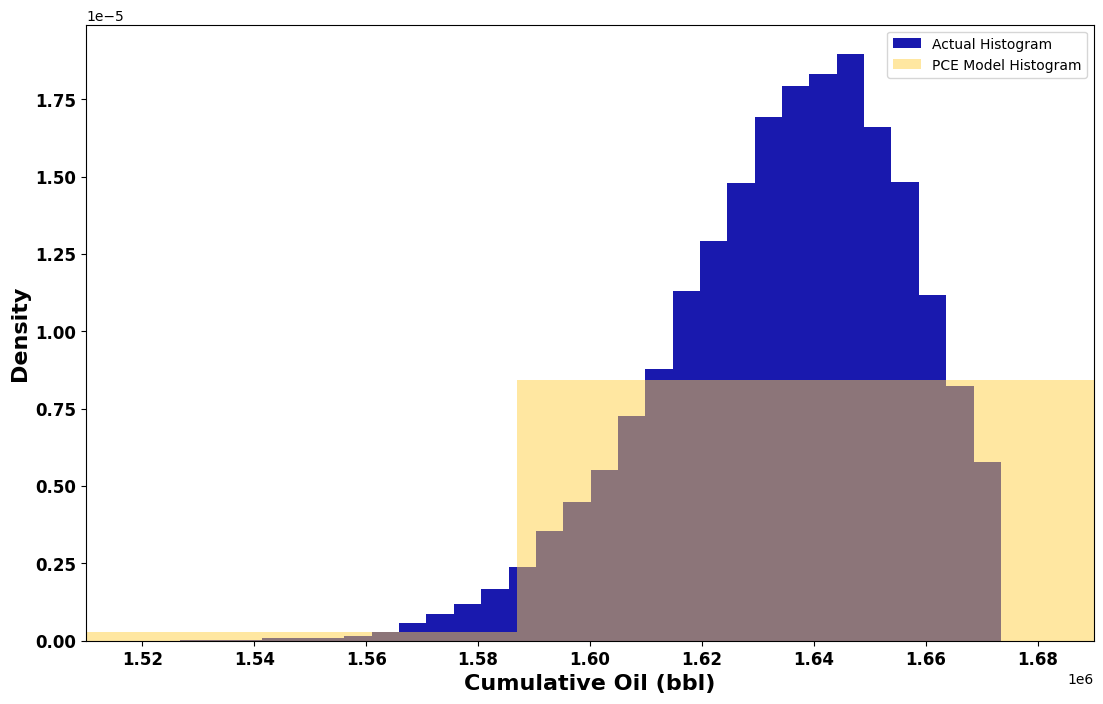

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.51e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(13, 8))

# Plot the first histogram
plt.hist(Test_Data2['Cum_Oil'], bins=30, alpha=0.9, color='#0000a5', label='Actual Histogram', density=True)

# Plot the second histogram with transparency
plt.hist(Test_Data2['Cum_Oil_PCE'], bins=30, alpha=0.5, color='#ffd145', label='PCE Model Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Density', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()

# Add grid
plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Histogram_Sample1000.png', dpi=600)
plt.show()

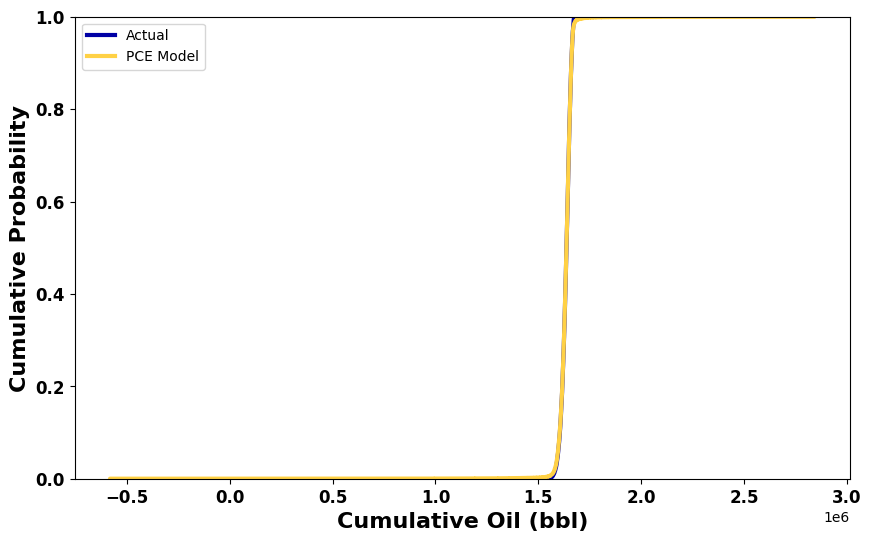

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Create the cumulative distribution plot
plt.figure(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data2, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data2, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Degree1000.png', dpi=600)
plt.show()

________

#**DEGREE 7**

In [36]:
first_1000_3 = df2.head(1500)
X = first_1000_3.drop(columns="Cum_Oil").to_numpy()
y = first_1000_3.Cum_Oil.to_numpy()

In [37]:
X.shape

(1500, 3)

In [38]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)


In [39]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [40]:
moments=pce.get_moments()
moments

(1627160.9954548366, 2050790924807.5784)

In [41]:
Test_Data3 = df2.tail(15576)
X_test = Test_Data3.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [42]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data3['Cum_Oil_PCE'] = y_test

Test_Data3.head()

CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil   Cum_Oil_PCE
1501  0.000004     1.007538   0.978277  1632511.8  1.633628e+06
1502  0.000005     0.902307   0.942910  1617914.4  1.618912e+06
1503  0.000004     1.031260   0.848172  1609882.5  1.610718e+06
1504  0.000004     1.056829   0.973438  1637668.4  1.637065e+06
1505  0.000004     1.049889   0.888677  1620282.4  1.619586e+06

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data3)

# Predict on training and test sets
y_test = Test_Data3['Cum_Oil']
y_test_PCE = Test_Data3['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0009831470635106128


In [44]:
import numpy as np

# Predict on training and test sets
y_test = Test_Data3['Cum_Oil'].to_numpy()
y_test_PCE = Test_Data3['Cum_Oil_PCE'].to_numpy()

# Number of samples
n_samples = len(y_test)

# Calculate the variance of the actual data
var_y = np.sum((y_test - np.mean(y_test))**2) / n_samples

# Calculate the sum of squared errors between actual and predicted values
squared_errors = np.sum((y_test - y_test_PCE)**2)

# Calculate the empirical error
epsilon_emp = squared_errors / var_y

print('Empirical error, epsilon_emp:', epsilon_emp)

Empirical error, epsilon_emp: 4712.196795336912


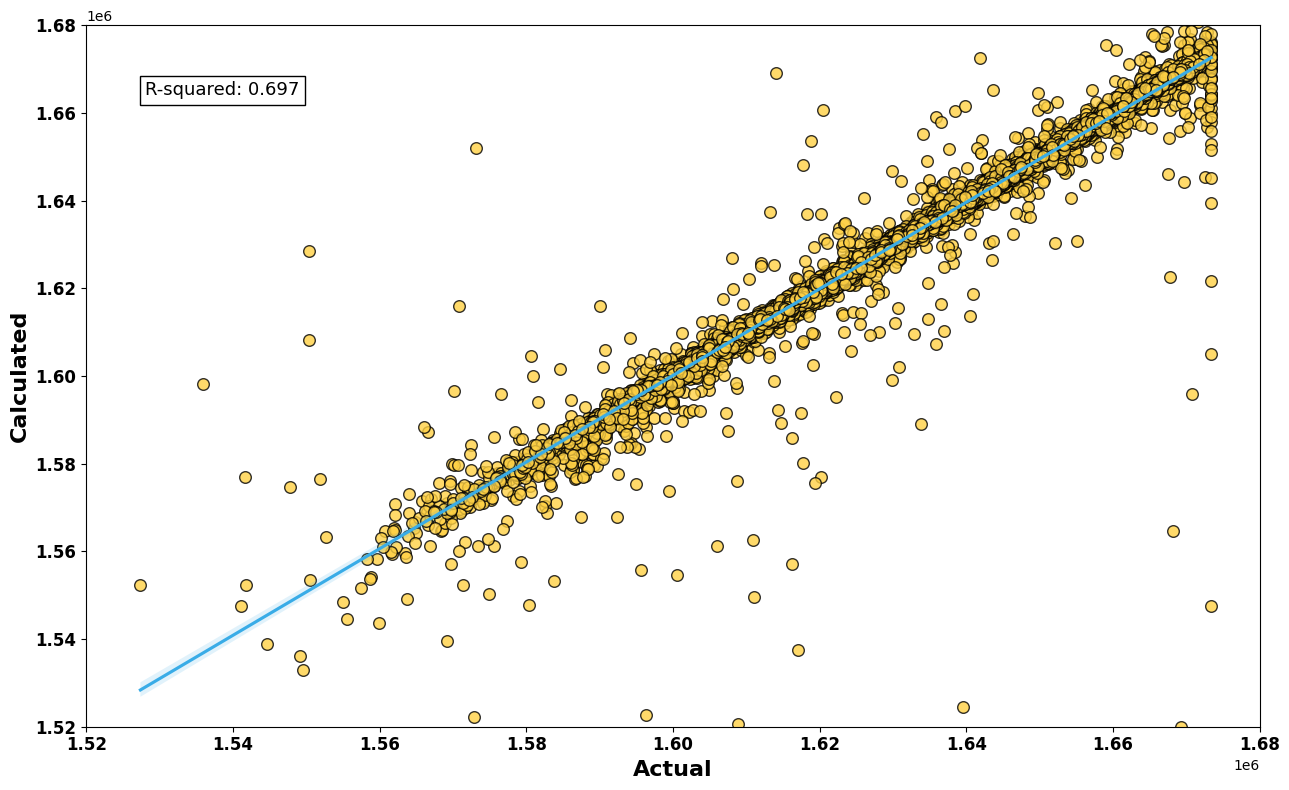

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data3['Cum_Oil']
y_test_PCE = Test_Data3['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Ensure the regression line lies diagonally by setting equal limits for both axes
min_val = min(y_test.min(), y_test_PCE.min())
max_val = max(y_test.max(), y_test_PCE.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample1500.png', dpi=600)
plt.show()

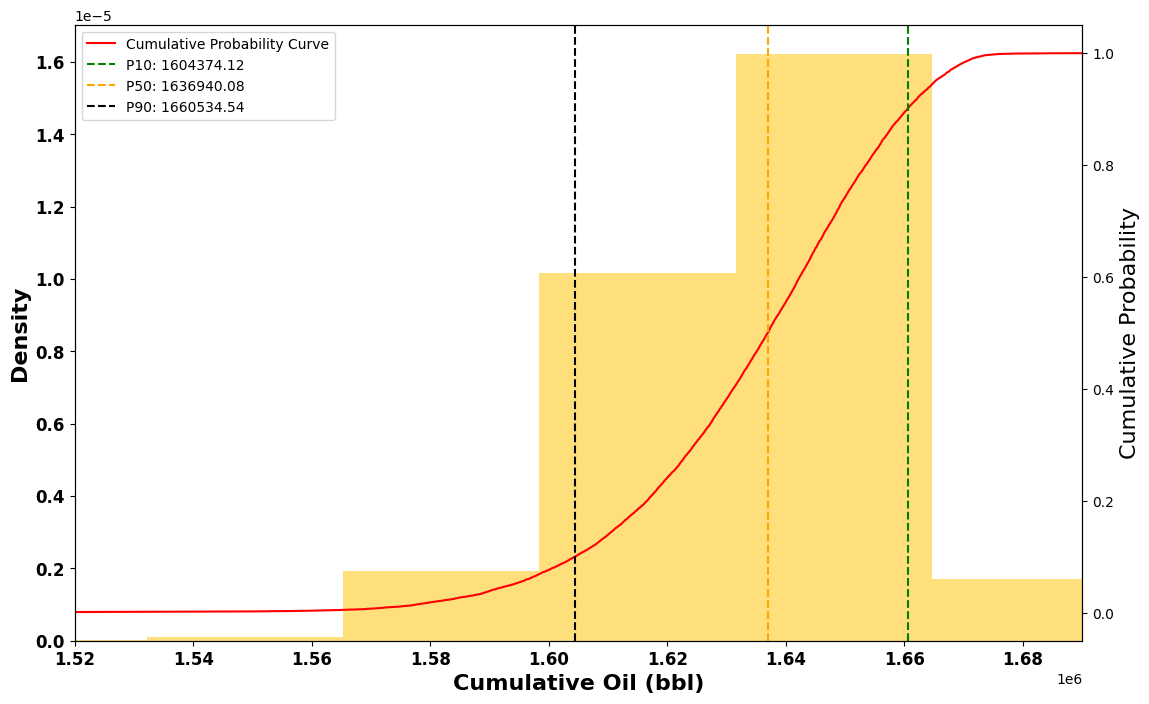

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histogram of Cumulative Oil
fig, ax = plt.subplots(figsize=(13, 8))

plt.hist(Test_Data3['Cum_Oil_PCE'], bins=30, alpha=0.7, color='#ffd145', label='Cumulative Oil Histogram', density=True)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')  # Adjust the font size here
plt.ylabel('Density', fontsize=16, fontweight='bold')  # Adjust the font size here
#plt.title('Histogram and Cumulative Probability of Cumulative Oil Production', fontsize=18)  # Adjust the font size here
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

plt.grid(False)

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Cumulative probability curve
sorted_cum_oil = np.sort(Test_Data3['Cum_Oil_PCE'])
cum_prob = np.arange(1, len(sorted_cum_oil)+1) / len(sorted_cum_oil)
plt.twinx()
plt.plot(sorted_cum_oil, cum_prob, color='red', label='Cumulative Probability Curve')

# Calculate the P90, P50, and P10
p90 = np.percentile(Test_Data3['Cum_Oil_PCE'], 10)
p50 = np.percentile(Test_Data3['Cum_Oil_PCE'], 50)
p10 = np.percentile(Test_Data3['Cum_Oil_PCE'], 90)

# Mark the P90, P50, and P10 on the plot
plt.axvline(x=p10, color='green', linestyle='--', label=f'P10: {p90:.2f}')
plt.axvline(x=p50, color='orange', linestyle='--', label=f'P50: {p50:.2f}')
plt.axvline(x=p90, color='black', linestyle='--', label=f'P90: {p10:.2f}')

plt.ylabel('Cumulative Probability', fontsize=16)  # Adjust the font size here
plt.legend(loc='upper left')

# Save the figure
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Histogram_PCE_Sample1500.png', dpi=600)
plt.show()

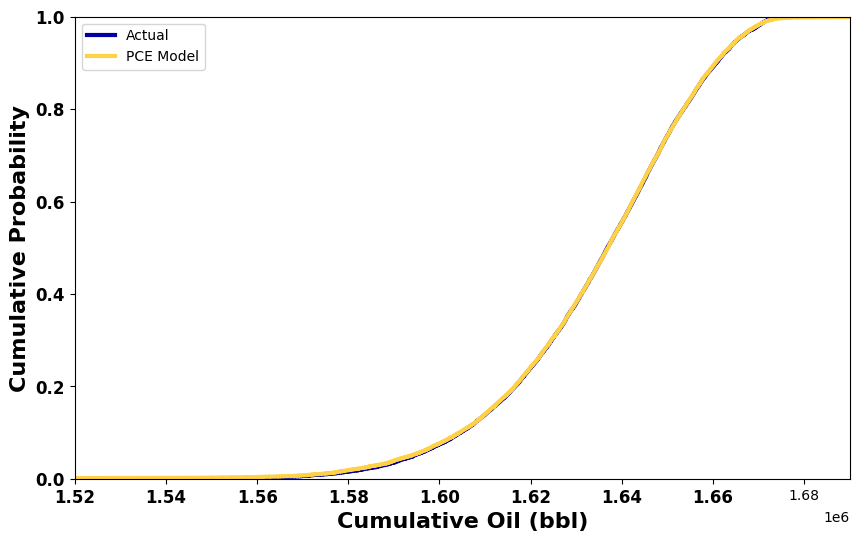

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Test_Data is already defined
# Test_Data = pd.read_csv('your_data_file.csv')  # Example if you need to load the data

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.69e6

# Plotting the histograms of Cumulative Oil and Cumulative Oil PCE
fig, ax = plt.subplots(figsize=(10, 6))

# Plot ECDF for Cum_Oil
sns.ecdfplot(data=Test_Data3, x='Cum_Oil', label='Actual', color='#0000a5', linewidth=3)

# Plot ECDF for Cum_Oil_PCE
sns.ecdfplot(data=Test_Data3, x='Cum_Oil_PCE', label='PCE Model', color='#ffd145', linewidth=3)

# Set the font size for x and y axis labels and title
plt.xlabel('Cumulative Oil (bbl)', fontsize=16, fontweight='bold')
plt.ylabel('Cumulative Probability', fontsize=16, fontweight='bold')
#plt.title('Cumulative Distribution of Cumulative Oil Production', fontsize=18)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Add a legend
plt.legend()
plt.legend(loc='upper left')

# Set the X-axis limits to match the first image
plt.xlim([x_min, x_max])

# Show the plot
fig.savefig('/content/drive/MyDrive/THESIS/Picture/CFD_Sample1500.png', dpi=600)
plt.show()

#**DEGREE 9**

In [55]:
first_1000_4 = df2.head(2500)
X = first_1000_4.drop(columns="Cum_Oil").to_numpy()
y = first_1000_4.Cum_Oil.to_numpy()

In [56]:
X.shape

(2500, 3)

In [57]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [58]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [59]:
moments=pce.get_moments()
moments

(1630793.7139995343, 1258156420460.7383)

In [60]:
Test_Data4 = df2.tail(14576)
X_test = Test_Data4.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [61]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data4['Cum_Oil_PCE'] = y_test

Test_Data4.tail()

CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil   Cum_Oil_PCE
17072  0.000005     1.002530   0.997680  1643914.0  1.642316e+06
17073  0.000004     1.020072   1.156218  1661441.1  1.661491e+06
17074  0.000004     0.787814   0.982429  1584137.9  1.584250e+06
17075  0.000005     0.881290   1.062378  1632599.6  1.632174e+06
17076  0.000005     1.074085   1.158148  1668201.6  1.668277e+06

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data4)

# Predict on training and test sets
y_test = Test_Data4['Cum_Oil']
y_test_PCE = Test_Data4['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0006165087437743043


In [62]:
import numpy as np

# Predict on training and test sets
y_test = Test_Data4['Cum_Oil'].to_numpy()
y_test_PCE = Test_Data4['Cum_Oil_PCE'].to_numpy()

# Number of samples
n_samples = len(y_test)

# Calculate the variance of the actual data
var_y = np.sum((y_test - np.mean(y_test))**2) / n_samples

# Calculate the sum of squared errors between actual and predicted values
squared_errors = np.sum((y_test - y_test_PCE)**2)

# Calculate the empirical error
epsilon_emp = squared_errors / var_y

print('Empirical error, epsilon_emp:', epsilon_emp)

Empirical error, epsilon_emp: 1126.842261118994


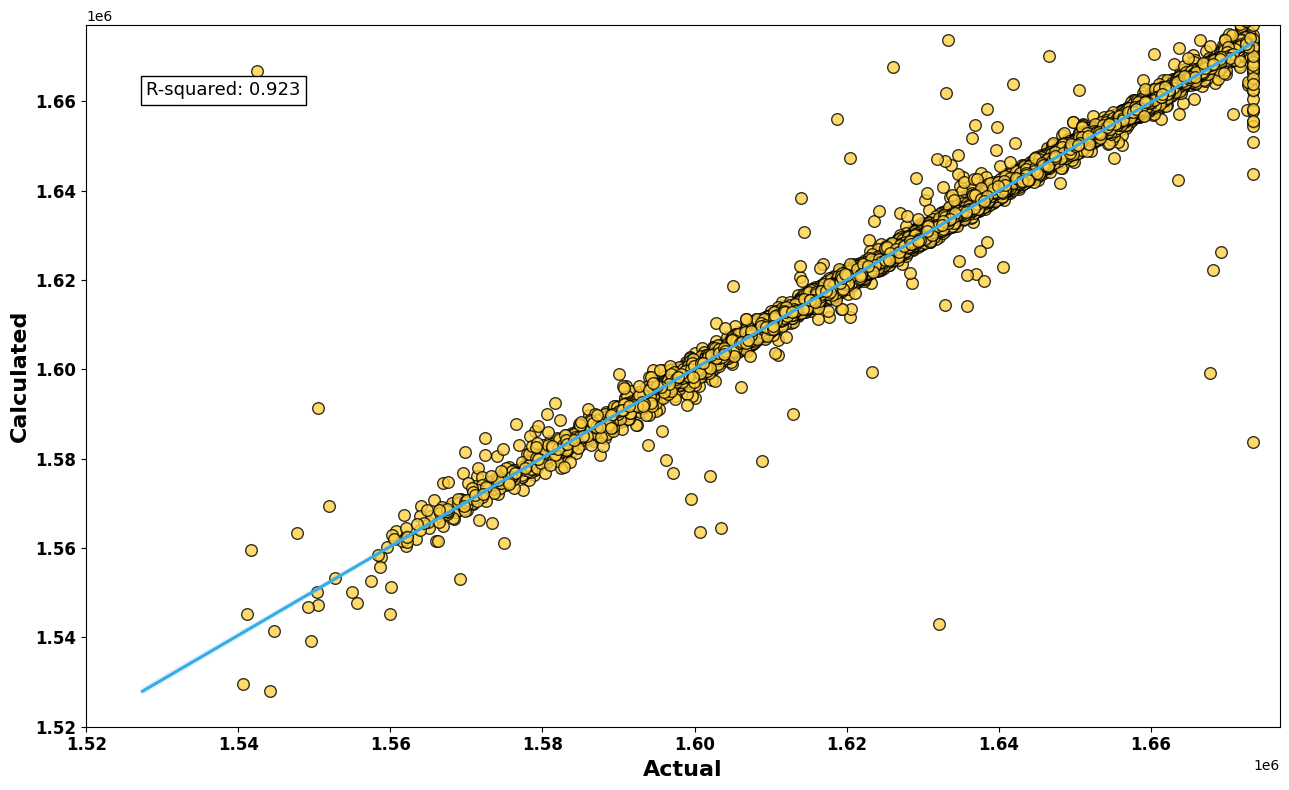

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data4['Cum_Oil']
y_test_PCE = Test_Data4['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample2500.png', dpi=600)
plt.show()

_________

#**Sample 3500**

In [64]:
first_1000_5 = df2.head(3500)
X = first_1000_5.drop(columns="Cum_Oil").to_numpy()
y = first_1000_5.Cum_Oil.to_numpy()

In [65]:
X.shape

(3500, 3)

In [66]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [67]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [68]:
moments=pce.get_moments()
moments

(1633369.5561895925, 798820894902.3585)

In [69]:
Test_Data5 = df2.tail(13576)
X_test = Test_Data5.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [70]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data5['Cum_Oil_PCE'] = y_test

Test_Data5.head()

CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil   Cum_Oil_PCE
3501  0.000005     1.162050   0.888303  1635876.0  1.637181e+06
3502  0.000004     1.037102   1.028739  1644454.3  1.643819e+06
3503  0.000005     1.117921   1.152567  1670477.0  1.670405e+06
3504  0.000004     0.967344   1.023810  1641268.0  1.640701e+06
3505  0.000004     1.066100   0.969287  1638184.0  1.638319e+06

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data5)

# Predict on training and test sets
y_test = Test_Data5['Cum_Oil']
y_test_PCE = Test_Data5['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0004925037987286836


In [72]:
import numpy as np

# Predict on training and test sets
y_test = Test_Data5['Cum_Oil'].to_numpy()
y_test_PCE = Test_Data5['Cum_Oil_PCE'].to_numpy()

# Number of samples
n_samples = len(y_test)

# Calculate the variance of the actual data
var_y = np.sum((y_test - np.mean(y_test))**2) / n_samples

# Calculate the sum of squared errors between actual and predicted values
squared_errors = np.sum((y_test - y_test_PCE)**2)

# Calculate the empirical error
epsilon_emp = squared_errors / var_y

print('Empirical error, epsilon_emp:', epsilon_emp)

Empirical error, epsilon_emp: 169.09329633979127


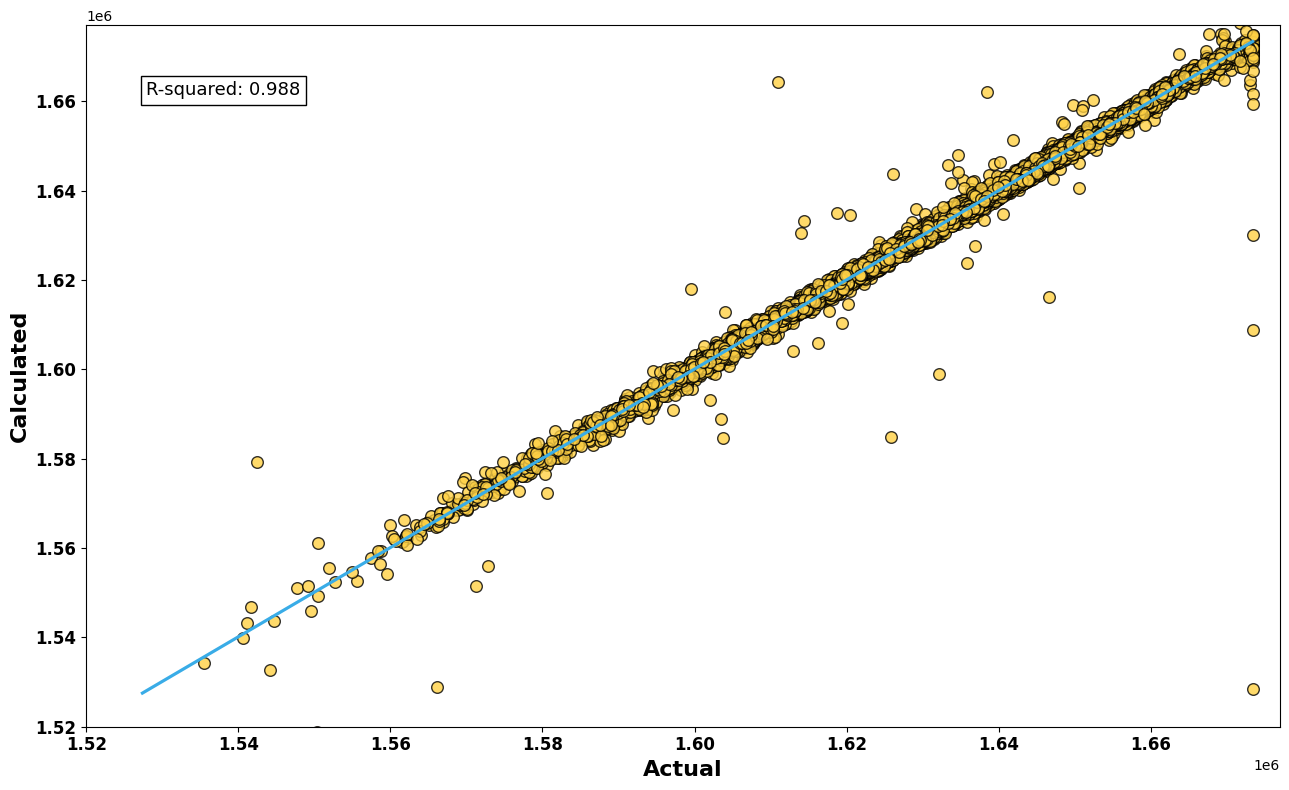

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data5['Cum_Oil']
y_test_PCE = Test_Data5['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample3000.png', dpi=600)
plt.show()

#**DEGREE 11**

In [108]:
first_1000_5 = df2.head(5000)
X = first_1000_5.drop(columns="Cum_Oil").to_numpy()
y = first_1000_5.Cum_Oil.to_numpy()

In [109]:
X.shape

(5000, 3)

In [110]:
# Determine the number of samples from the DataFrame
n_samples = len(X)

# Define normal distributions for each parameter
ccpor_dist = Normal(loc=4.5e-6, scale=4.83579e-7)
permi_multi_dist = Normal(loc=1.001, scale=0.107569)
por_multi_dist = Normal(loc=1.001, scale=0.107569)

# Create a list of these normal distributions
marginals = [ccpor_dist, permi_multi_dist, por_multi_dist]

# Create a joint distribution object with independent marginals
joint_distribution = JointIndependent(marginals=marginals)

# Generate samples
samples = joint_distribution.rvs(n_samples)

In [111]:
# Define the maximum degree for the polynomial basis
max_degree = 11

# Create polynomial basis using TotalDegreeBasis
polynomial_basis = TotalDegreeBasis(distributions=joint_distribution, max_degree=max_degree)

# Define the regression method
least_squares = LeastSquareRegression()

# Create the Polynomial Chaos Expansion (PCE) object
pce = PolynomialChaosExpansion(polynomial_basis=polynomial_basis, regression_method=least_squares)

# Fit the PCE model to the input (x) and output (y) data
pce.fit(X, y)

In [112]:
moments=pce.get_moments()
moments

(1631990.1392988325, 349499661177.35364)

In [118]:
Test_Data6 = df2.tail(12076)
X_test = Test_Data6.drop(columns="Cum_Oil").to_numpy()
y_test = pce.predict(X_test)

In [119]:
# Add the predicted_y as a new column to the Z DataFrame
Test_Data6['Cum_Oil_PCE'] = y_test

Test_Data6.head()


CCPOR  PERMI_MULTI  POR_MULTI    Cum_Oil   Cum_Oil_PCE
5001  0.000004     0.918560   0.986569  1626675.0  1.626174e+06
5002  0.000004     0.933631   0.988497  1631463.8  1.630287e+06
5003  0.000005     0.977226   0.994955  1639559.0  1.637962e+06
5004  0.000004     1.179274   0.949577  1640276.1  1.641408e+06
5005  0.000005     1.006534   1.170567  1662584.8  1.662702e+06

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

n_samples = len(Test_Data6)

# Predict on training and test sets
y_test = Test_Data6['Cum_Oil']
y_test_PCE = Test_Data6['Cum_Oil_PCE']

error = np.sum(np.abs((y_test - y_test_PCE)/y_test))/n_samples

print('Mean rel. error, LSTSQ:', error)

Mean rel. error, LSTSQ: 0.0004359963923180662


In [123]:
import numpy as np

# Predict on training and test sets
y_test = Test_Data6['Cum_Oil'].to_numpy()
y_test_PCE = Test_Data6['Cum_Oil_PCE'].to_numpy()

# Number of samples
n_samples = len(y_test)

# Calculate the variance of the actual data
var_y = np.sum((y_test - np.mean(y_test))**2) / n_samples

# Calculate the sum of squared errors between actual and predicted values
squared_errors = np.sum((y_test - y_test_PCE)**2)

# Calculate the empirical error
epsilon_emp = squared_errors / var_y

print('Empirical error, epsilon_emp:', epsilon_emp)

Empirical error, epsilon_emp: 50.53106107979078


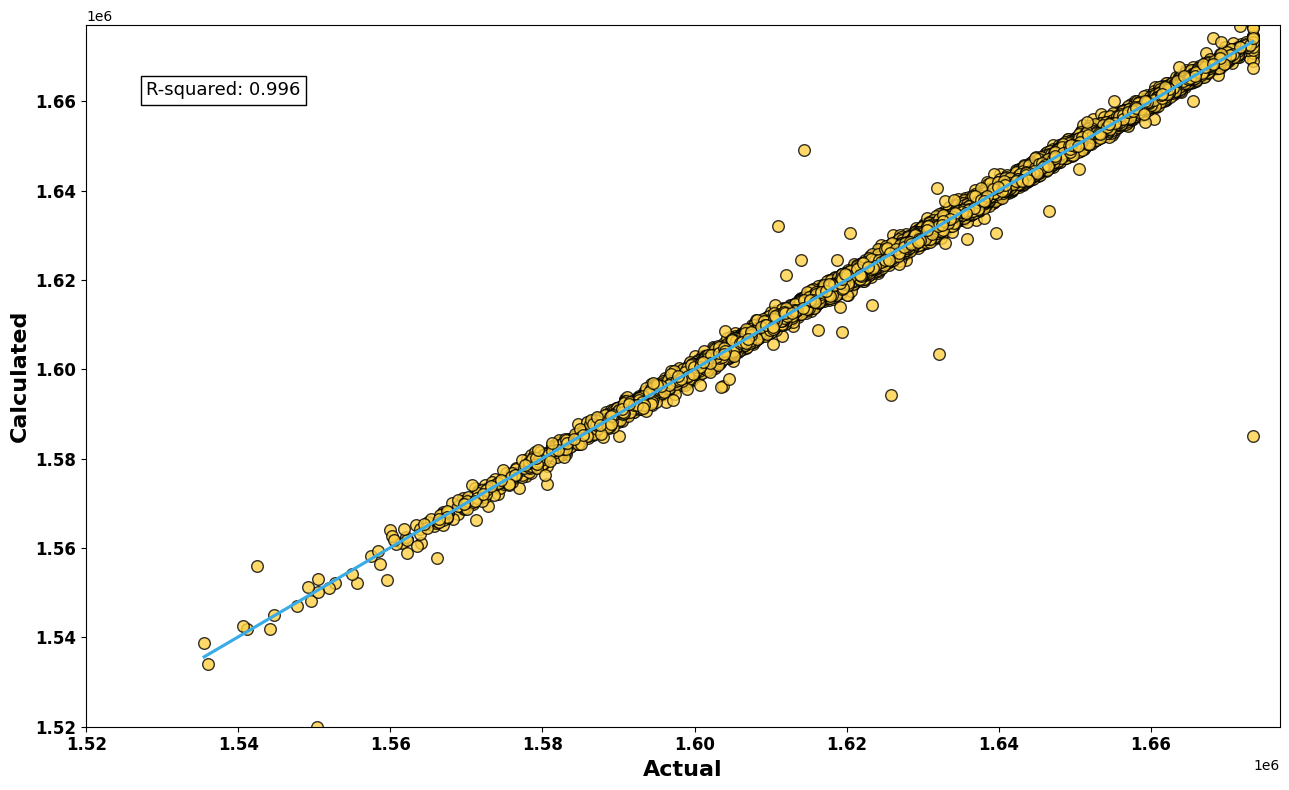

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Assuming test_data_plot is already defined
# Extract the actual and predicted values for the test set
y_test = Test_Data6['Cum_Oil']
y_test_PCE = Test_Data6['Cum_Oil_PCE']

# Calculate R-squared value
test_r2 = r2_score(y_test, y_test_PCE)

# Create a DataFrame for the test set plot
test_data_plot = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_PCE
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.677e6

# Create the plot
fig, ax = plt.subplots(figsize=(13, 8))
reg_plot = sns.regplot(x='Actual', y='Predicted', data=test_data_plot,
                       scatter_kws={'s': 70, 'color': '#ffd145', 'edgecolor': 'black'},
                       line_kws={'color': '#39ACE7'})
#plt.title('Actual vs. PCE Model - 3 Degree Polynomial', fontweight='bold', fontsize=16)
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Calculated', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')  # Set x-tick properties
plt.yticks(fontsize=12, fontweight='bold')  # Set y-tick properties

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Add R-squared value to the plot
plt.text(0.05, 0.9, f'R-squared: {test_r2:.3f}', transform=reg_plot.transAxes, fontsize=13,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Crossplot_Sample5000.png', dpi=600)
plt.show()

______

_________

#**Combine Plot**

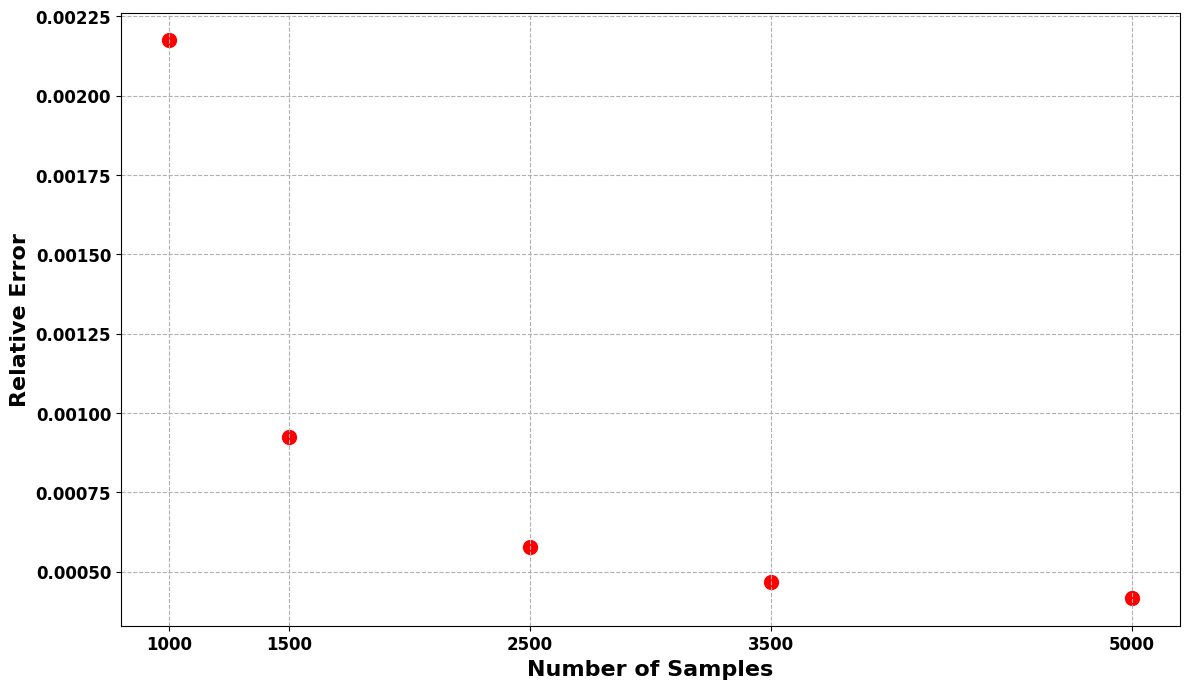

In [84]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [1000, 1500, 2500, 3500, 5000]
relative_errors = [0.00217431, 0.00092561, 0.00057854, 0.00046662, 0.00041784]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, relative_errors, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('Number of Samples', fontweight='bold', fontsize=16)
plt.ylabel('Relative Error', fontweight='bold', fontsize=16)
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, which="both", ls="--")

# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/Relative_Error_Plot_SampleTune.png', dpi=300)
plt.show()

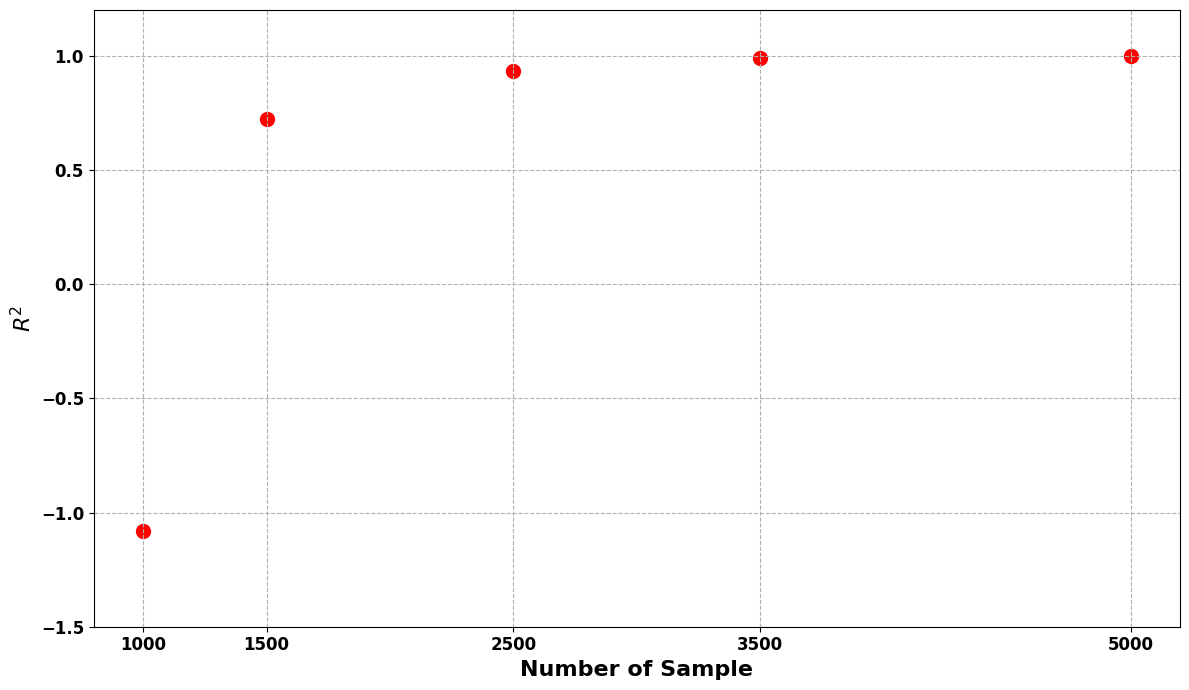

In [94]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [1000, 1500, 2500, 3500, 5000]
r2_values = [-1.08065, 0.724, 0.934, 0.990, 0.997]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, r2_values, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('Number of Sample', fontweight='bold', fontsize=16)
plt.ylabel('$R^{{2}}$', fontweight='bold', fontsize=16)
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')

# Adjust y-axis limits to enhance visibility
plt.ylim(-1.5, 1.2)  # Adjust the range based on the data

plt.grid(True, which="both", ls="--")

# Remove scientific notation from y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/R2_Plot_Adjusted.png', dpi=300)
plt.show()

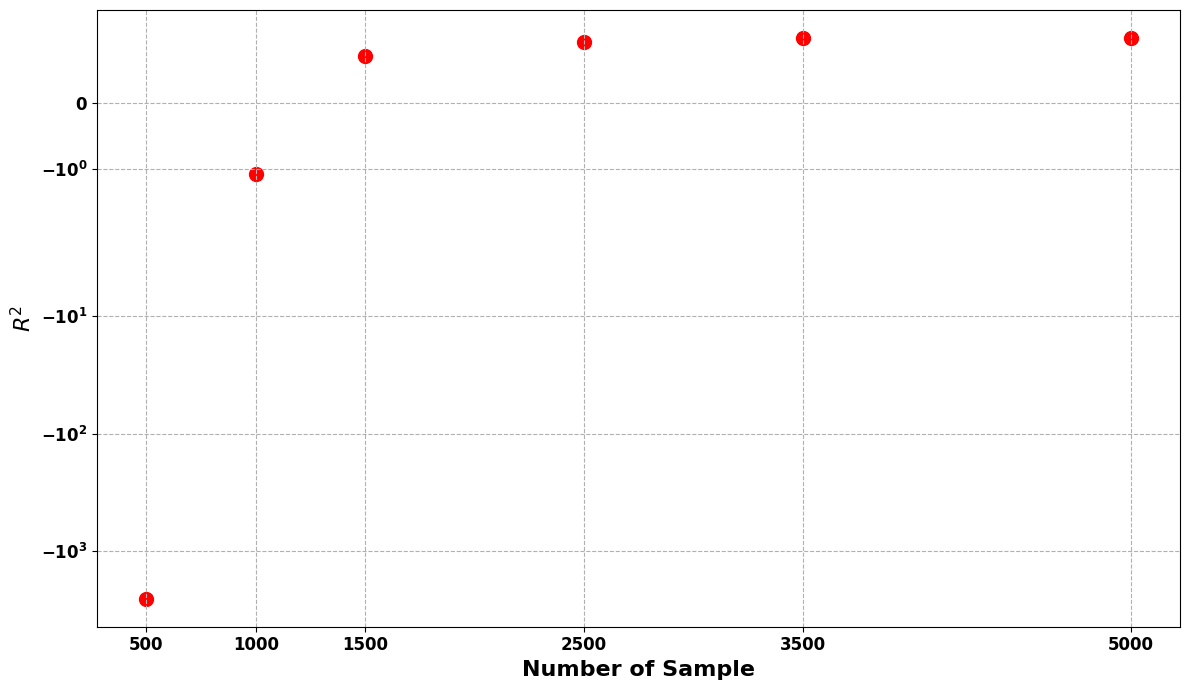

In [134]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [500, 1000, 1500, 2500, 3500, 5000]
r2_values = [-2533, -1.08065, 0.724, 0.934, 0.990, 0.997]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, r2_values, color='red', s=100)  # s is the size of the markers

# Set y-axis to symmetric log scale
ax.set_yscale('symlog')

# Formatting
plt.xlabel('Number of Sample', fontweight='bold', fontsize=16)
plt.ylabel('$R^2$', fontweight='bold', fontsize=16)  # Correct LaTeX formatting for R-squared
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')

plt.grid(True, which="both", ls="--")

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/R2_Plot_Log_Adjusted2.png', dpi=300)
plt.show()


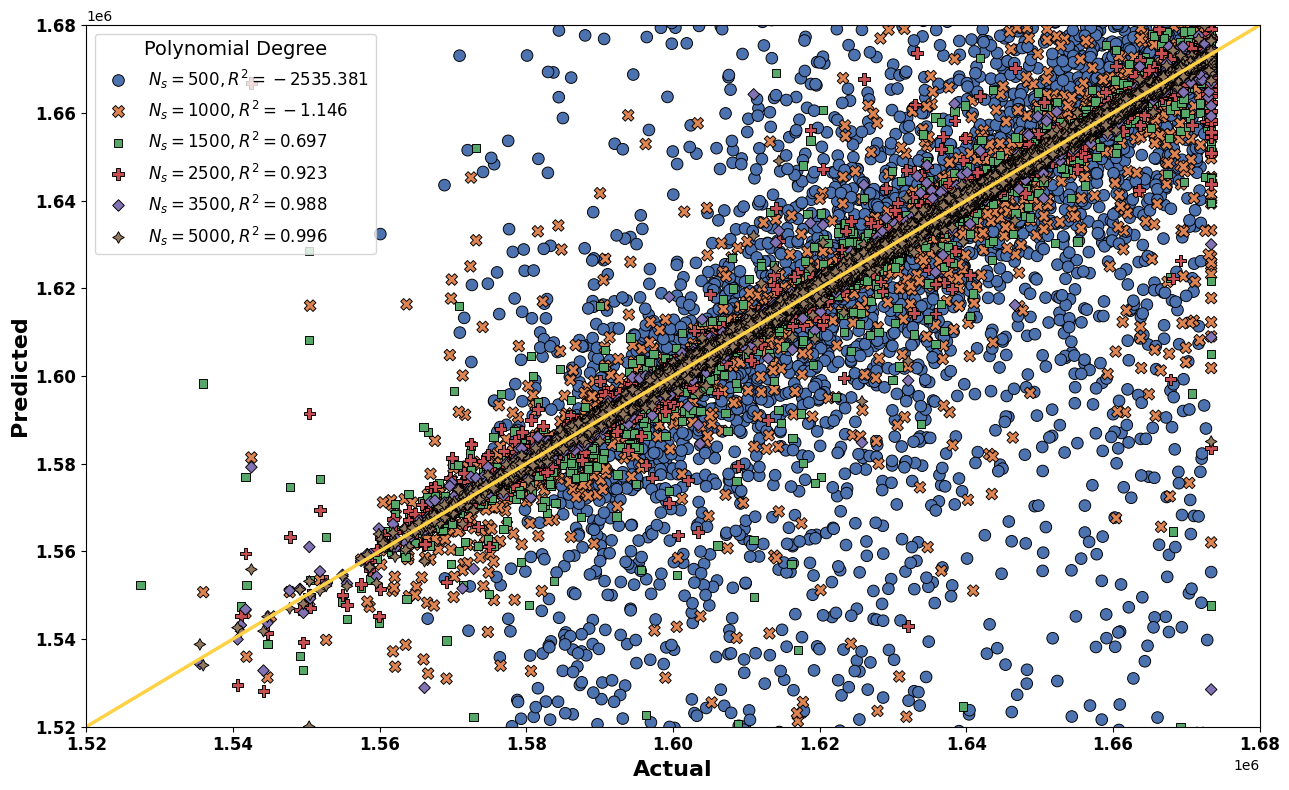

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

# Extract the actual and predicted values for each test set
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']
y_test1 = Test_Data2['Cum_Oil']
y_test_PCE1 = Test_Data2['Cum_Oil_PCE']
y_test2 = Test_Data3['Cum_Oil']
y_test_PCE2 = Test_Data3['Cum_Oil_PCE']
y_test3 = Test_Data4['Cum_Oil']
y_test_PCE3 = Test_Data4['Cum_Oil_PCE']
y_test4 = Test_Data5['Cum_Oil']
y_test_PCE4 = Test_Data5['Cum_Oil_PCE']
y_test5 = Test_Data6['Cum_Oil']
y_test_PCE5 = Test_Data6['Cum_Oil_PCE']

# Calculate R-squared values
r2_0 = r2_score(y_test, y_test_PCE)
r2_1 = r2_score(y_test1, y_test_PCE1)
r2_2 = r2_score(y_test2, y_test_PCE2)
r2_3 = r2_score(y_test3, y_test_PCE3)
r2_4 = r2_score(y_test4, y_test_PCE4)
r2_5 = r2_score(y_test5, y_test_PCE5)

# Create a DataFrame for the combined plot
combined_data = pd.DataFrame({
    'Actual': pd.concat([y_test, y_test1, y_test2, y_test3, y_test4, y_test5]),
    'Predicted': pd.concat([y_test_PCE, y_test_PCE1, y_test_PCE2, y_test_PCE3, y_test_PCE4, y_test_PCE5]),
    'Degree': (['Degree 0'] * len(y_test) + ['Degree 3'] * len(y_test1) + ['Degree 5'] * len(y_test2) +
               ['Degree 7'] * len(y_test3) + ['Degree 9'] * len(y_test4) +
               ['Degree 11'] * len(y_test5))
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Plot settings
fig, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(x='Actual', y='Predicted', hue='Degree', style='Degree',
                data=combined_data, s=70, palette='deep', edgecolor='black', ax=ax)

# Draw a diagonal line
min_val = min(combined_data['Actual'].min(), combined_data['Predicted'].min())
max_val = max(combined_data['Actual'].max(), combined_data['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='#ffd145', linewidth=2.5)

# Set axis limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add labels and title
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Predicted', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Polynomial Degree', fontsize=12, title_fontsize=14)

# Add R-squared values to the legend
handles, labels = ax.get_legend_handles_labels()
r2_labels = [f'$N_{{s}}={500}, R^{{2}}={r2_0:.3f}$',
             f'$N_{{s}}={1000}, R^{{2}}={r2_1:.3f}$',
             f'$N_{{s}}={1500}, R^{{2}}={r2_2:.3f}$',
             f'$N_{{s}}={2500}, R^{{2}}={r2_3:.3f}$',
             f'$N_{{s}}={3500}, R^{{2}}={r2_4:.3f}$',
             f'$N_{{s}}={5000}, R^{{2}}={r2_5:.3f}$']
plt.legend(handles, r2_labels, title='Polynomial Degree', fontsize=12, title_fontsize=14)

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Crossplot_TuningSample.png', dpi=600)
plt.show()

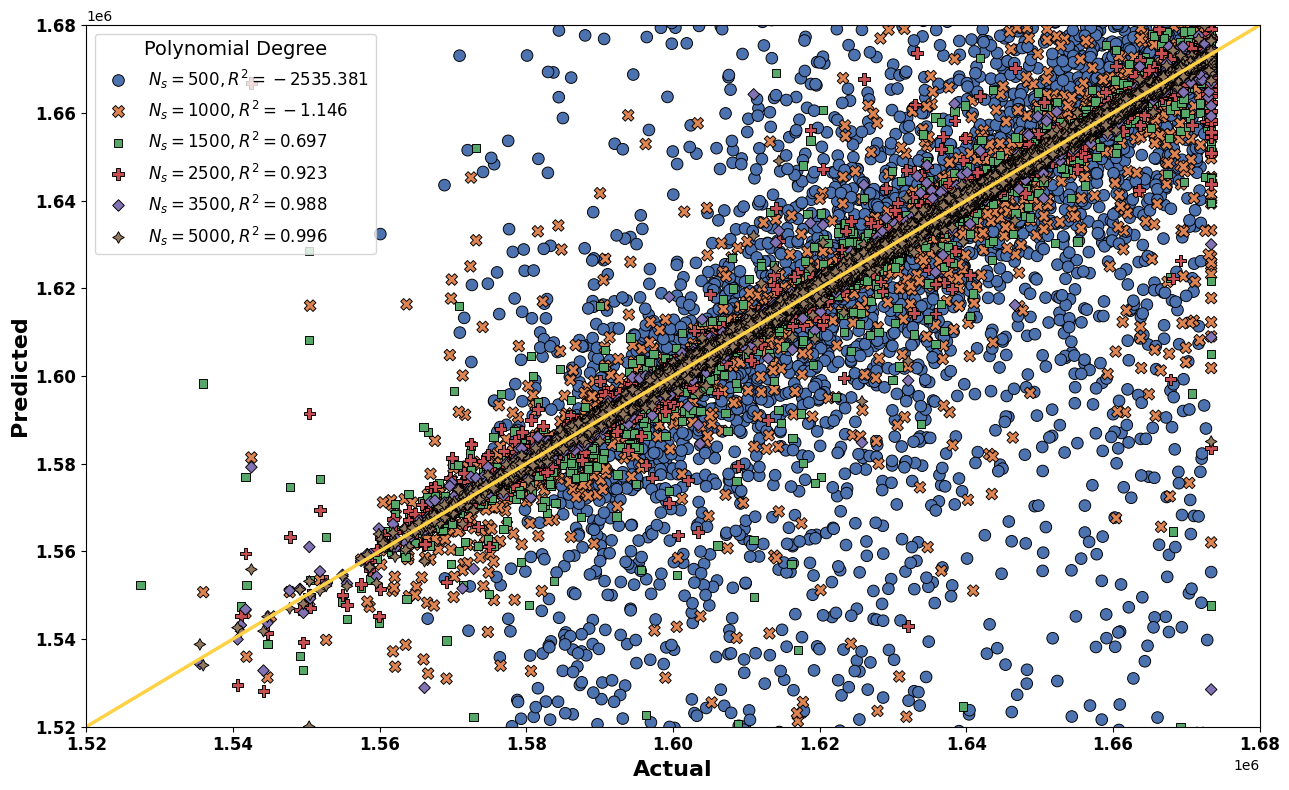

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import pandas as pd

# Extract the actual and predicted values for each test set
y_test = Test_Data['Cum_Oil']
y_test_PCE = Test_Data['Cum_Oil_PCE']
y_test1 = Test_Data2['Cum_Oil']
y_test_PCE1 = Test_Data2['Cum_Oil_PCE']
y_test2 = Test_Data3['Cum_Oil']
y_test_PCE2 = Test_Data3['Cum_Oil_PCE']
y_test3 = Test_Data4['Cum_Oil']
y_test_PCE3 = Test_Data4['Cum_Oil_PCE']
y_test4 = Test_Data5['Cum_Oil']
y_test_PCE4 = Test_Data5['Cum_Oil_PCE']
y_test5 = Test_Data6['Cum_Oil']
y_test_PCE5 = Test_Data6['Cum_Oil_PCE']

# Calculate R-squared values
r2_0 = r2_score(y_test, y_test_PCE)
r2_1 = r2_score(y_test1, y_test_PCE1)
r2_2 = r2_score(y_test2, y_test_PCE2)
r2_3 = r2_score(y_test3, y_test_PCE3)
r2_4 = r2_score(y_test4, y_test_PCE4)
r2_5 = r2_score(y_test5, y_test_PCE5)

# Create a DataFrame for the combined plot
combined_data = pd.DataFrame({
    'Actual': pd.concat([y_test, y_test1, y_test2, y_test3, y_test4, y_test5]),
    'Predicted': pd.concat([y_test_PCE, y_test_PCE1, y_test_PCE2, y_test_PCE3, y_test_PCE4, y_test_PCE5]),
    'Degree': (['Degree 0'] * len(y_test) + ['Degree 3'] * len(y_test1) + ['Degree 5'] * len(y_test2) +
               ['Degree 7'] * len(y_test3) + ['Degree 9'] * len(y_test4) +
               ['Degree 11'] * len(y_test5))
})

# Extracting X-axis limits from the first image (1.54e6 to 1.66e6)
x_min = 1.52e6
x_max = 1.68e6

# Plot settings
fig, ax = plt.subplots(figsize=(13, 8))
sns.scatterplot(x='Actual', y='Predicted', hue='Degree', style='Degree',
                data=combined_data, s=70, palette='deep', edgecolor='black', ax=ax)

# Draw a diagonal line
min_val = min(combined_data['Actual'].min(), combined_data['Predicted'].min())
max_val = max(combined_data['Actual'].max(), combined_data['Predicted'].max())
ax.plot([min_val, max_val], [min_val, max_val], color='#ffd145', linewidth=2.5)

# Set axis limits
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add labels and title
plt.xlabel('Actual', fontweight='bold', fontsize=16)
plt.ylabel('Predicted', fontweight='bold', fontsize=16)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Polynomial Degree', fontsize=12, title_fontsize=14)

# Add R-squared values to the legend
handles, labels = ax.get_legend_handles_labels()
r2_labels = [f'$N_{{s}}={500}, R^{{2}}={r2_0:.3f}$',
             f'$N_{{s}}={1000}, R^{{2}}={r2_1:.3f}$',
             f'$N_{{s}}={1500}, R^{{2}}={r2_2:.3f}$',
             f'$N_{{s}}={2500}, R^{{2}}={r2_3:.3f}$',
             f'$N_{{s}}={3500}, R^{{2}}={r2_4:.3f}$',
             f'$N_{{s}}={5000}, R^{{2}}={r2_5:.3f}$']
plt.legend(handles, r2_labels, title='Polynomial Degree', fontsize=12, title_fontsize=14)

# Set the X-axis and Y-axis limits to match the range of actual and predicted values
plt.xlim([x_min, x_max])
plt.ylim([x_min, x_max])

# Show plot
plt.tight_layout()
fig.savefig('/content/drive/MyDrive/THESIS/Picture/Combined_Crossplot_TuningSample2.png', dpi=600)
plt.show()

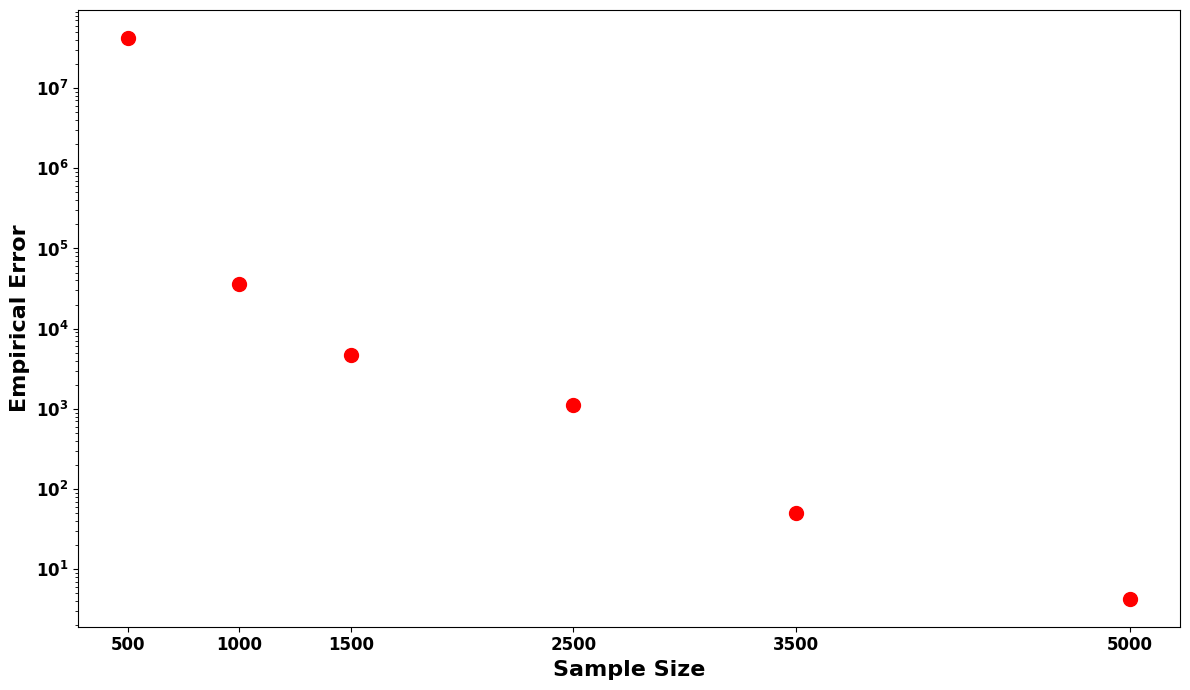

In [129]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [500, 1000, 1500, 2500, 3500, 5000]
relative_errors = [42043047, 35580.253, 4712.196, 1126.842, 50.5310, 4.3021]  # Added one more value to match the length

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, relative_errors, color='red', s=100)  # s is the size of the markers

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Formatting
plt.xlabel('Sample Size', fontweight='bold', fontsize=16)  # Corrected x-axis label
plt.ylabel('Empirical Error', fontweight='bold', fontsize=16)  # Updated to 'Empirical Error' to match the context
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(False)  # Enable grid for better readability

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/Empirical_Error_Plot_Sample_Tuning.png', dpi=300)
plt.show()

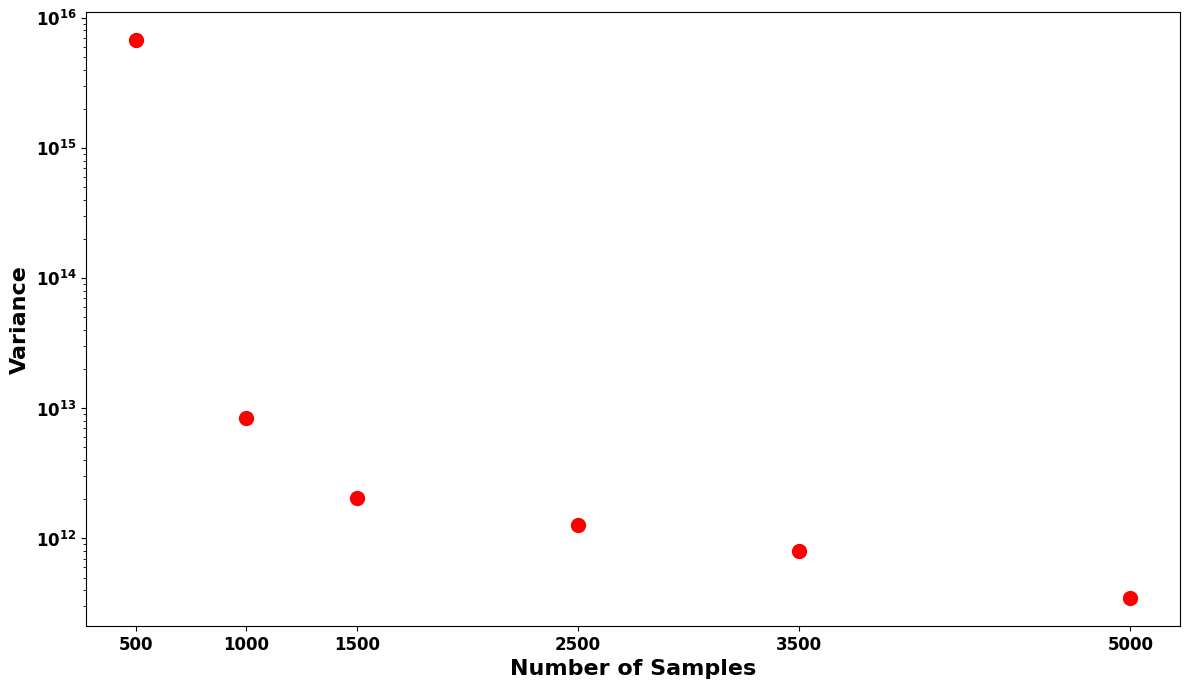

In [139]:
import matplotlib.pyplot as plt

# Data
sample_sizes = [500, 1000, 1500, 2500, 3500, 5000]
variance = [6728018168148006.0, 8458851360223.883, 2050790924807.5784, 1258156420460.7383, 798820894902.3585, 349499661177.35364]

# Plot settings
fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(sample_sizes, variance, color='red', s=100)  # s is the size of the markers

# Formatting
plt.xlabel('Number of Samples', fontweight='bold', fontsize=16)
plt.ylabel('Variance', fontweight='bold', fontsize=16)
plt.xticks(sample_sizes, fontsize=12, fontweight='bold')  # Set x-tick labels to sample sizes
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(False)

# Set y-axis to logarithmic scale to handle the large variance range
ax.set_yscale('log')

# Remove scientific notation from y-axis
# plt.ticklabel_format(style='plain', axis='y')  # This line is not needed with log scale

# Save the figure
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/THESIS/Picture/Variance_Plot_TuningSample.png', dpi=300)
plt.show()